In [1]:
#importing necessary packages
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Loading the saved model
model1 = load_model('hand_emoji_v5.h5')
print(model1)

In [3]:
#method for preprocessing image
def keras_process_image(img):
    image_x = 50
    image_y = 50

    # Converting from BGR Colours Space to HSV
    img =  cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    # Defining HSV Threadholds
    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask = cv2.inRange(img,lower_threshold,upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask,(3,3),0)

    # Extracting skin from the threshold mask
    skin  =  cv2.bitwise_and(img,img,mask=skinMask)
    
    skin = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)
    (thresh, skin) = cv2.threshold(skin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #cv2.imwrite('IMG.jpg', skin)
    
    #resizing the input image just to be sure
    img = cv2.resize(skin, (image_x, image_y)) 
    kernel = np.ones((2,2),np.uint8)
    img = cv2.dilate(img, kernel,iterations = 2)
    img = cv2.erode(img, kernel,iterations = 1)
    
    
    #cv2.imwrite('IMG.jpg', img)
    
    img1 = np.array(img, dtype=np.float32)
    img1 = np.reshape(img1, (1, image_x, image_y, -1))
    #print(img.shape)
    return img, img1

#This method takes model and image as input and returns its maximum probability of the image being in a particular class and the class
def keras_predict(model, image):
    processed = image
    pred_prob = model.predict(processed)[0]
    pred_class = list(pred_prob).index(max(pred_prob))
    return max(pred_prob), pred_class

In [4]:
#dictionary of all the classes
letter_count = {0:'error', 1:'one', 2:'victory', 3:'ok', 4:'high-five', 5:'rock', 6:'call-me', 7:'vulcan-salute', 8:'thumbs-up', 9:'dog', 10:'fist', 11:'point-up'}

# Output through webcam

In [ ]:
cap = cv2.VideoCapture(0)

while(1):
    _, img = cap.read()
    img = cv2.flip(img,1)
    contour = img[:,320:]
    contour = cv2.resize(contour,(100,100))
    image, img_data = keras_process_image(contour)
    #cv2.imwrite('newimg'+str(i)+'.jpg', img_data)
    prob, cla = keras_predict(model1, img_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#img
    mask = cv2.imread('hand_emo/'+str(cla)+'.png',0)
    mask = cv2.flip(mask,1)
    mask = cv2.resize(mask,(200,200))
    invmask = cv2.bitwise_not(mask)
    rows, cols = mask.shape    
    
    roi = img[260:rows+260,0:cols]
    img1_bg = cv2.bitwise_and(roi,roi,mask=mask)
    img1_fg = cv2.bitwise_and(mask, mask, mask=invmask)
    
    dst = cv2.add(img1_bg,img1_fg)
    img[260:rows+260,0:cols] = dst
    cv2.imshow("image",img)
    cv2.imshow("contour",image)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# check the contour if it shows the hand's gesture in white and everything else in black then its good or else change the background and lighting

# Getting output through taking image input manually through imread

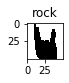

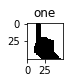

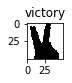

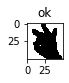

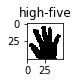

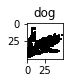

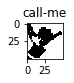

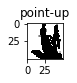

In [5]:
for i in range(8):
    image = cv2.imread("IMG_"+str(i)+".jpg")
    image, img_data = keras_process_image(image)
    cv2.imwrite('newimg'+str(i)+'.jpg', img_data)
    prob, cla = keras_predict(model1, img_data)
    plt.figure(i+1)
    plt.subplot(181+i)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.title(letter_count[cla])
    
    #letter_count[pred_class] is getting the tag from the dictionary and saving the image with its name
    #cv2.imwrite("newimg_"+letter_count[pred_class]+".jpg",image)
    #print(letter_count[pred_class])
    